In [1]:
# Libraries

import matplotlib
import os
import platform
import shutil
import sys

In [2]:
# Root directory

ROOT = os.getcwd()

while not ROOT.endswith('upolanc-thesis') :
	ROOT = os.path.abspath(os.path.join(ROOT, os.pardir))

	if len(ROOT) < len('upolanc-thesis') :
		if   platform.system() == 'Linux' :
			ROOT = '/d/hpc/home/up4472/workspace/upolanc-thesis'
		elif platform.system() == 'Windows' :
			ROOT = 'C:\\Developer\\Workspace\\PyCharm\\Projects\\upolanc-thesis'
		else :
			raise ValueError()

		print(f'Warning : could not find correct directory, using default : {ROOT}')
		break

if ROOT not in sys.path :
	sys.path.append(ROOT)

os.chdir(ROOT)

In [3]:
# Code

from source.python.data.feature import annodata as data_anndata
from source.python.data.feature import tsne     as data_tsne
from source.python.io           import loader   as data_loader

# 1. Setup

In [4]:
# Setup some directory paths

CWD = ROOT
OUT = os.path.join(CWD, 'output')
RES = os.path.join(CWD, 'resources')

OUT_DATA  = os.path.join(OUT,      'nbp03-tsne')
OUT_PLOT  = os.path.join(OUT_DATA, 'plot')
RES_NBP02 = os.path.join(OUT,      'nbp02-anndata')

shutil.rmtree(OUT_DATA, ignore_errors = True)

os.makedirs(OUT_DATA, exist_ok = True)
os.makedirs(OUT_PLOT, exist_ok = True)

print(f'     Root Directory : {CWD}')
print(f'   Output Directory : {OUT_DATA}')
print(f'   Output Directory : {OUT_PLOT}')
print(f' Resource Directory : {RES_NBP02}')

     Root Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\output\nbp03-tsne
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\output\nbp03-tsne\plot
 Resource Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\output\nbp02-anndata


In [5]:
# Load the annotated data

anndata = data_loader.load_h5ad(
	filename = os.path.join(RES_NBP02, 'arabidopsis-r36.h5ad')
)

# 2. TSNE

## 2.1 Filtering

In [6]:
# Select the most prominent genes (not implemented)

# with warnings.catch_warnings() :
# 	warnings.simplefilter('ignore')

# 	mask = data_tsne.select_genes(
# 		matrix    = anndata.X,
# 		n         = 3000,
# 		threshold = 0,
# 		decay     = 1,
# 		xoffset   = 5,
# 		yoffset   = 0.02
# 	)

# 	anndata = anndata[:, mask].copy()

## 2.2 Features

In [7]:
# Compute and save the pca from standardized log1p values and keep the top 50 components

anndata = data_anndata.compute_pca(
	data       = anndata,
	layer      = 'standard',
	store_into = 'pca50',
	components = 50
)

## 2.3 Embeddings

In [8]:
# Compute and save the tsne embeddings

anndata = data_tsne.compute_tsne(
	data       = anndata,
	features   = 'pca50',
	store_into = 'tsne'
)

## 2.4 Visualization

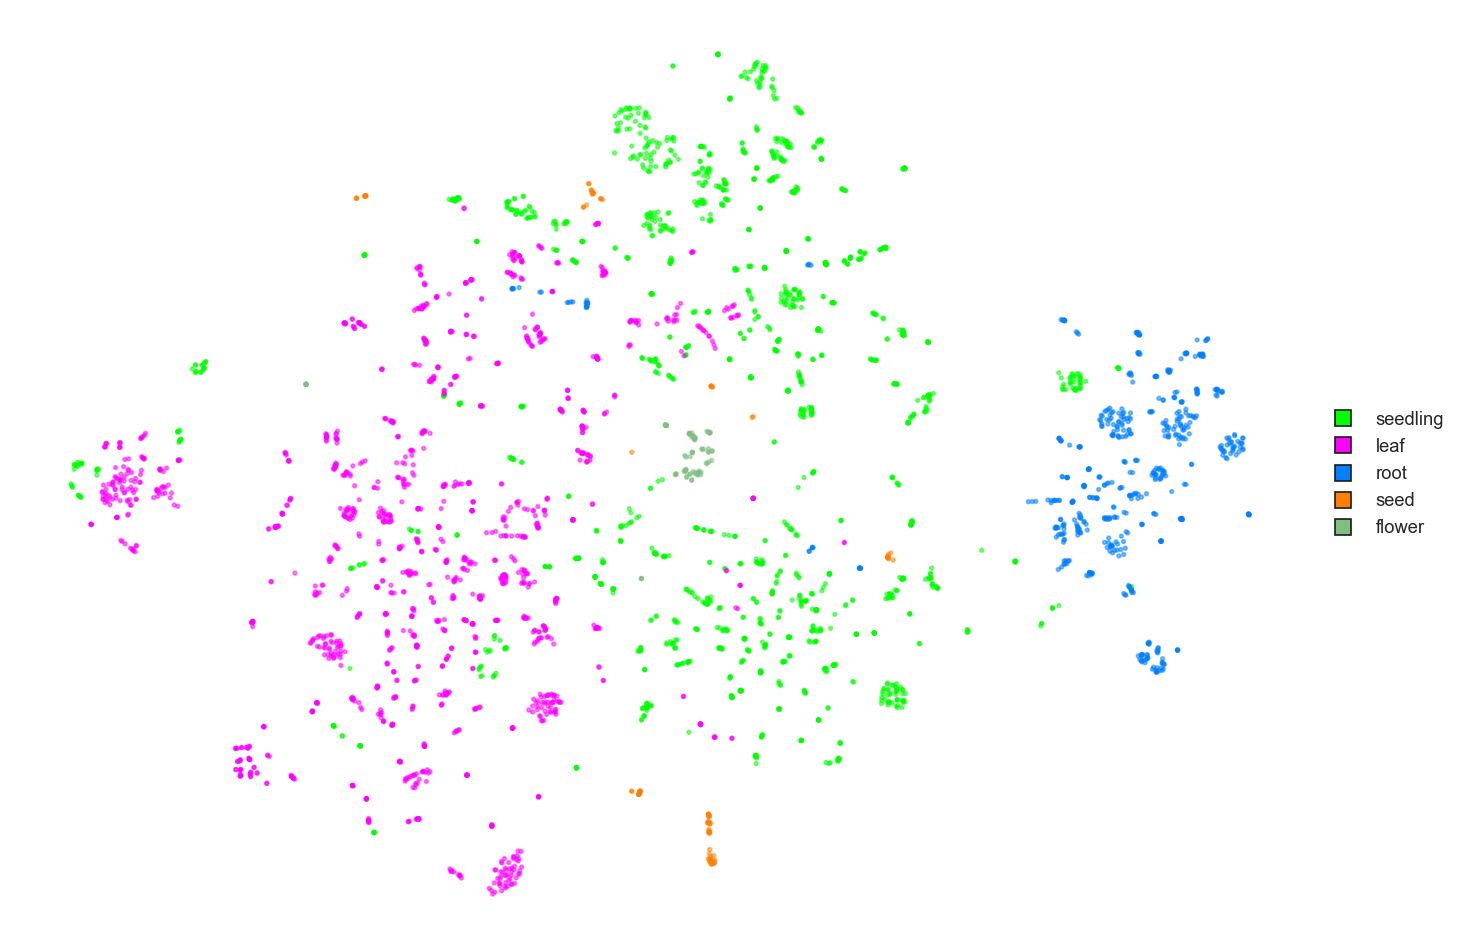

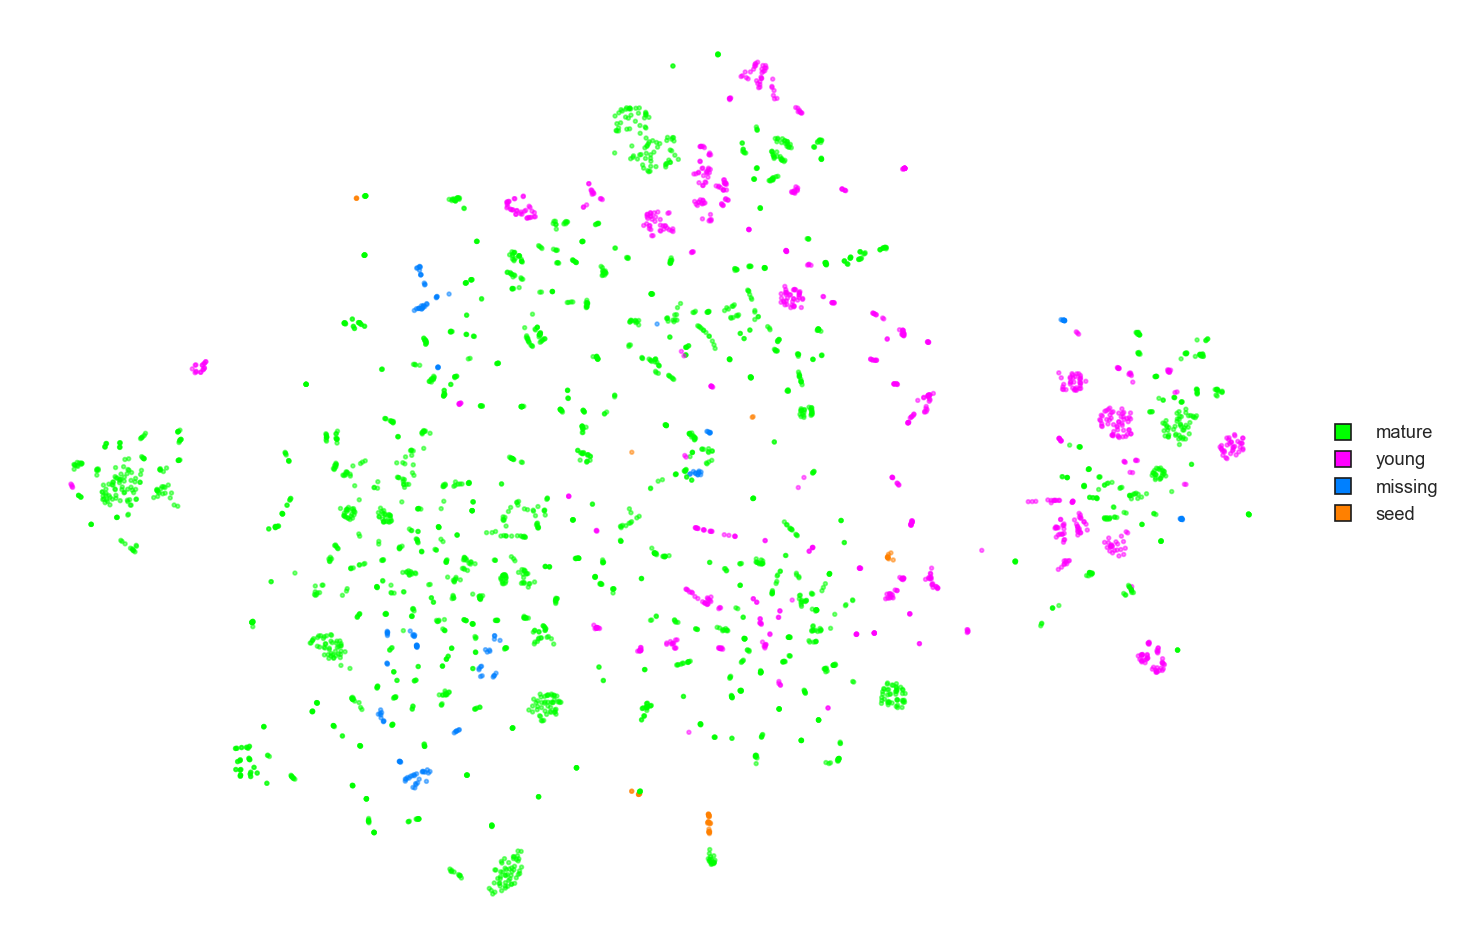

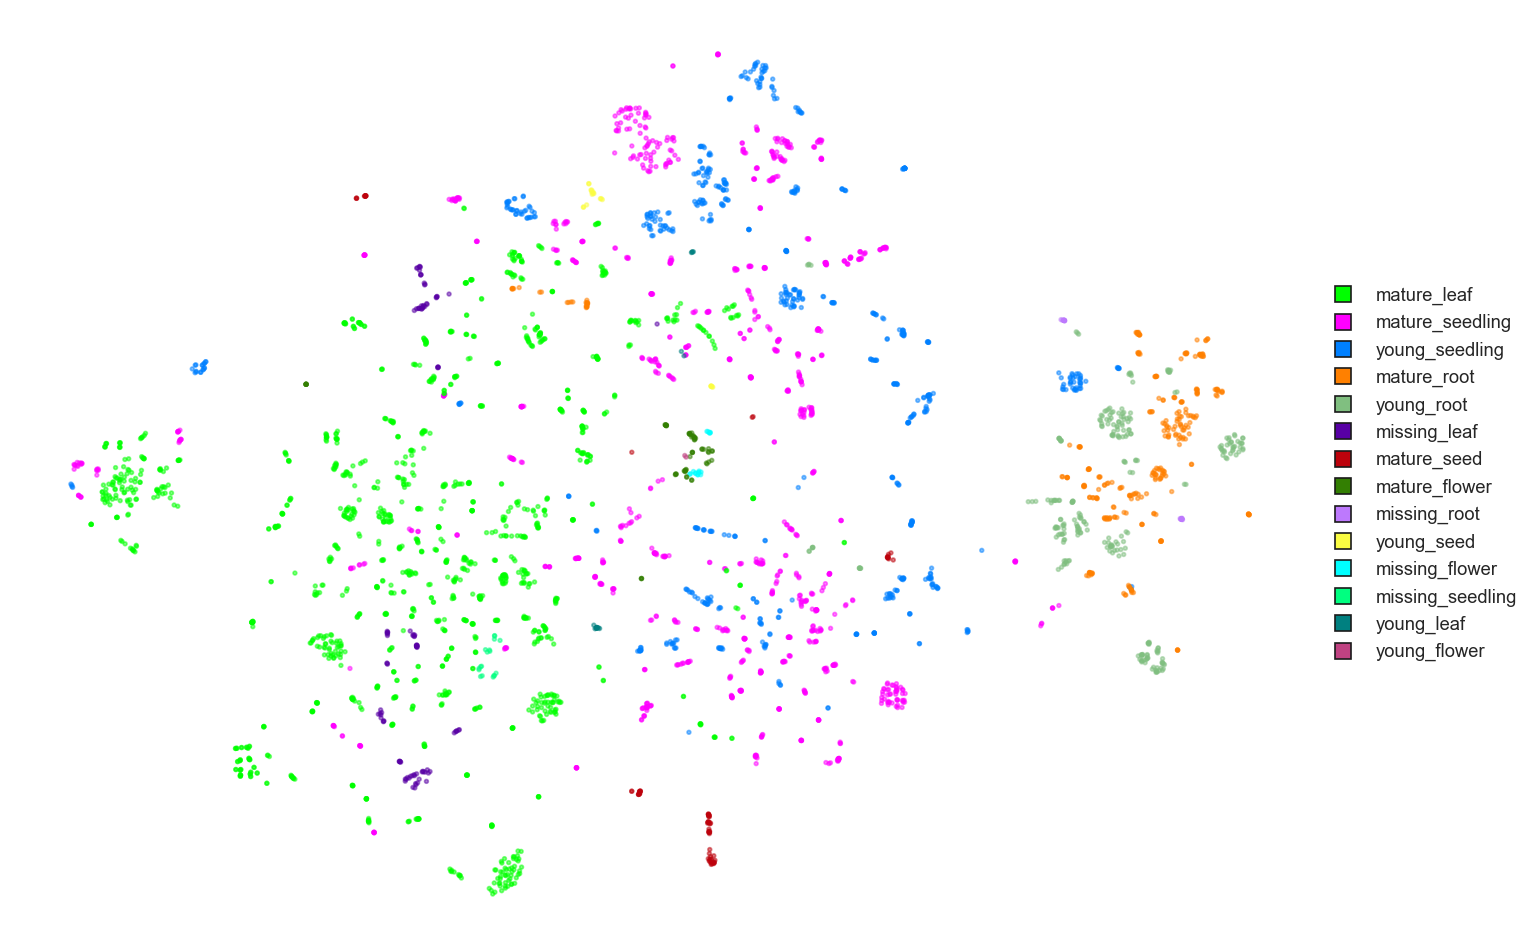

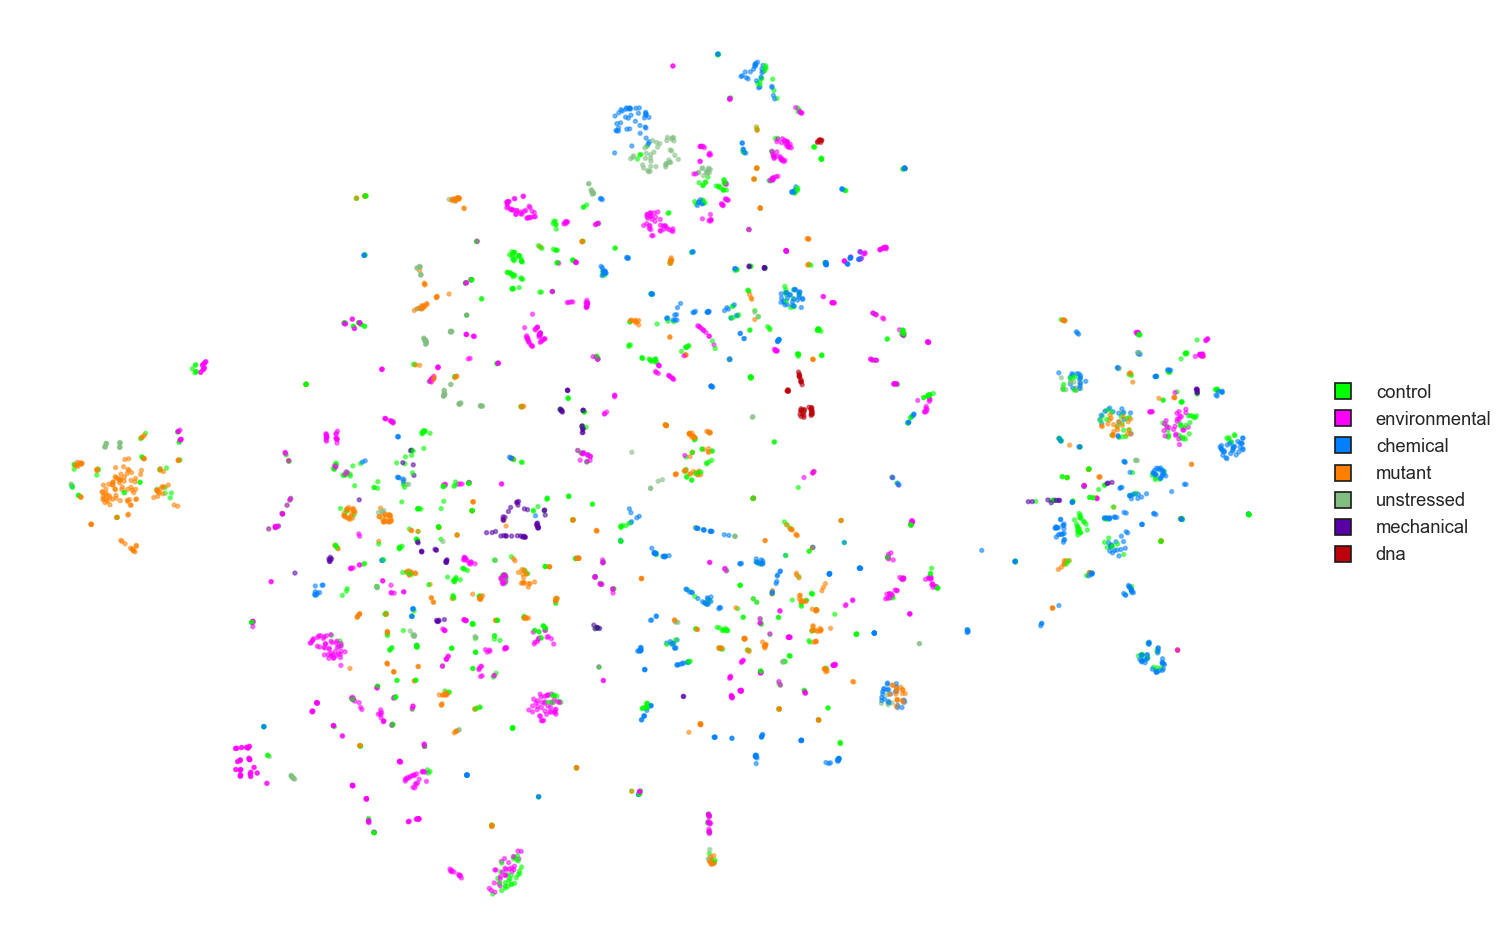

In [9]:
# Display tsne visualization for diffrent gene groups

for group in ['tissue', 'age', 'group', 'perturbation'] :
	data_tsne.visualize(
		data     = anndata,
		feature  = 'tsne',
		groupby  = group.capitalize(),
		filename = os.path.join(OUT_PLOT, 'tsne-' + group),
		alpha    = 0.5,
		size     = 5
	)

	matplotlib.pyplot.show()